### CNN 예제
- 사용할 예제 데이터 셋은 CIFAR 10
- 10개의 정답으로 분류된 학습이미지다
- airplain, automobile, bird 등
- 32 X 32 칼라 이미지

In [1]:
# 라이브러리 호출
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout


In [47]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [48]:
# 데이터 확인

print("변경하기 전 x_train 데이터 형태 =", x_train.shape)
print("x_test의 데이터 형태 =", x_test.shape)
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3) # 데이터 구조를 (높이, 너비, 채널)로 변환

print("변경 후 x_train 데이터 형태 =", x_train.shape, "\n 음? 차이가 없다?")
print(y_train.shape, y_test.shape)


변경하기 전 x_train 데이터 형태 = (50000, 32, 32, 3)
x_test의 데이터 형태 = (10000, 32, 32, 3)
변경 후 x_train 데이터 형태 = (50000, 32, 32, 3) 
 음? 차이가 없다?
(50000, 1) (10000, 1)


In [49]:
# 데이터 정규화
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
# 반드시 한번만 실행하자. 안그러면 쭉쭉 줄어든다

In [50]:
# 모델 구축

cnn = Sequential()

cnn.add(Conv2D(input_shape = (32, 32, 3), 
               kernel_size = (3, 3), 
               filters = 32, activation = 'relu'))
cnn.add(Conv2D(kernel_size = (3, 3), 
               filters = 64, activation = 'relu'))
cnn.add(MaxPool2D(pool_size = (2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())

cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation = 'softmax'))

In [51]:
# 모델 컴파일

cnn.compile(loss = "sparse_categorical_crossentropy", 
            optimizer = tf.keras.optimizers.Adam(),
            metrics = ["accuracy"])


In [52]:
# 모델 학습

hist = cnn.fit(x_train, 
               y_train, 
               batch_size = 128, 
               epochs = 30, 
               validation_data = (x_test, y_test))


Epoch 1/30
391/391 [==============================] - 74s 189ms/step - loss: 1.7013 - accuracy: 0.3783 - val_loss: 1.3418 - val_accuracy: 0.5216
Epoch 2/30
391/391 [==============================] - 70s 179ms/step - loss: 1.3855 - accuracy: 0.5036 - val_loss: 1.1826 - val_accuracy: 0.5817
Epoch 3/30
391/391 [==============================] - 68s 173ms/step - loss: 1.2467 - accuracy: 0.5556 - val_loss: 1.0701 - val_accuracy: 0.6254
Epoch 4/30
391/391 [==============================] - 71s 181ms/step - loss: 1.1556 - accuracy: 0.5889 - val_loss: 0.9998 - val_accuracy: 0.6512
Epoch 5/30
391/391 [==============================] - 69s 176ms/step - loss: 1.0913 - accuracy: 0.6136 - val_loss: 0.9751 - val_accuracy: 0.6579
Epoch 6/30
391/391 [==============================] - 69s 176ms/step - loss: 1.0388 - accuracy: 0.6336 - val_loss: 0.9575 - val_accuracy: 0.6639
Epoch 7/30
391/391 [==============================] - 68s 175ms/step - loss: 0.9997 - accuracy: 0.6455 - val_loss: 0.9243 - val_ac

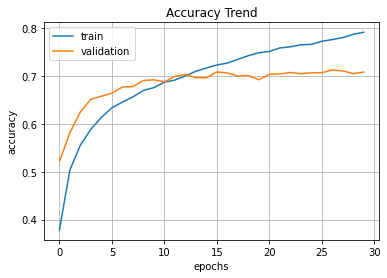

In [54]:
# 분석 정확도

import matplotlib.pyplot as plt

plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(['train', 'validation'], loc = "best")
plt.grid()
plt.show()

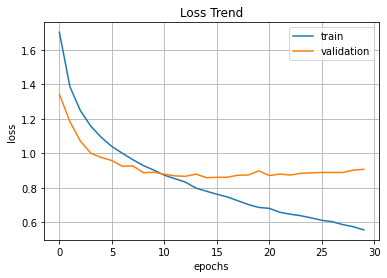

In [55]:
# 분석 loss값

plt.plot(hist.history["loss"])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(['train', 'validation'], loc = "best")
plt.grid()
plt.show()